In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all the required libraries

In [2]:
# Importing the dataset

dataset=pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# To find the shape of the dataset
dataset.shape

(1156, 7)

In [4]:
# To get the detailed information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
# Filling the "na" values with "Others" in the PURPOSE column of the dataset
dataset["PURPOSE"].fillna("Others", inplace=True)
dataset["PURPOSE"]

C:\Users\spand\AppData\Local\Temp\ipykernel_11348\888143431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["PURPOSE"].fillna("Others", inplace=True)


0        Meal/Entertain
1                Others
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
1155             Others
Name: PURPOSE, Length: 1156, dtype: object

In [6]:
# Formatting the "START_DATE" and "END_DATE" column into date_time
dataset["START_DATE"]=pd.to_datetime(dataset["START_DATE"], errors="coerce")
dataset["END_DATE"]=pd.to_datetime(dataset["END_DATE"], errors="coerce")

In [7]:
# Splitting the "START_DATE" column into "date" and "time" column
from datetime import datetime

dataset["date"]=pd.DatetimeIndex(dataset["START_DATE"]).date
dataset["time"]=pd.DatetimeIndex(dataset["START_DATE"]).hour
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Others,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN


In [8]:
# Converting the time into 4 categories which are Morning, Afternoon, Evening, and Night
dataset["day-time"]=pd.cut(x=dataset["time"], bins=[0, 10, 15, 19, 24], labels=["Morning", "Afternoon", "Evening", "Night"])

In [9]:
dataset.sample(50)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-time
201,2016-03-07 12:10:00,2016-03-07 12:26:00,Business,Fayetteville Street,Meredith Townes,5.9,Customer Visit,2016-03-07,12.0,Afternoon
899,2016-11-03 12:43:00,2016-11-03 12:49:00,Business,Hazelwood,Whitebridge,2.4,Others,2016-11-03,12.0,Afternoon
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Others,2016-10-08,15.0,Afternoon
801,2016-10-10 17:22:00,2016-10-10 17:28:00,Business,Islamabad,Islamabad,1.7,Others,2016-10-10,17.0,Evening
390,NaT,NaT,Business,Raleigh,Cary,14.0,Meeting,NaT,NaN,NaN
550,NaT,NaT,Personal,Elk Park,Banner Elk,12.2,Others,NaT,NaN,NaN
351,2016-05-04 15:16:00,2016-05-04 15:37:00,Business,Cary,Morrisville,8.7,Meal/Entertain,2016-05-04,15.0,Afternoon
337,NaT,NaT,Business,Cary,Durham,9.9,Meeting,NaT,NaN,NaN
1068,NaT,NaT,Business,Rawalpindi,Islamabad,7.2,Customer Visit,NaT,NaN,NaN
358,2016-05-06 05:47:00,2016-05-06 06:02:00,Business,Capitol One,Mcvan,14.4,Meeting,2016-05-06,5.0,Morning


In [10]:
# Checking for the "na" values
dataset.isna().sum()

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
date          735
time          735
day-time      742
dtype: int64

In [11]:
# Droping the rows with null values
dataset.dropna(inplace=True)

In [12]:
dataset.duplicated().sum()

np.int64(0)

In [13]:
# Droping the duplicates rows
dataset.drop_duplicates(inplace=True)

In [14]:
# For Data Visualization, checking the unique values in dataset
# Coumns with the object datatype
obj=(dataset.dtypes=="object")
object_cols=list(obj[obj].index)

In [15]:
unique_values={}
for col in object_cols:
    unique_values[col]=dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

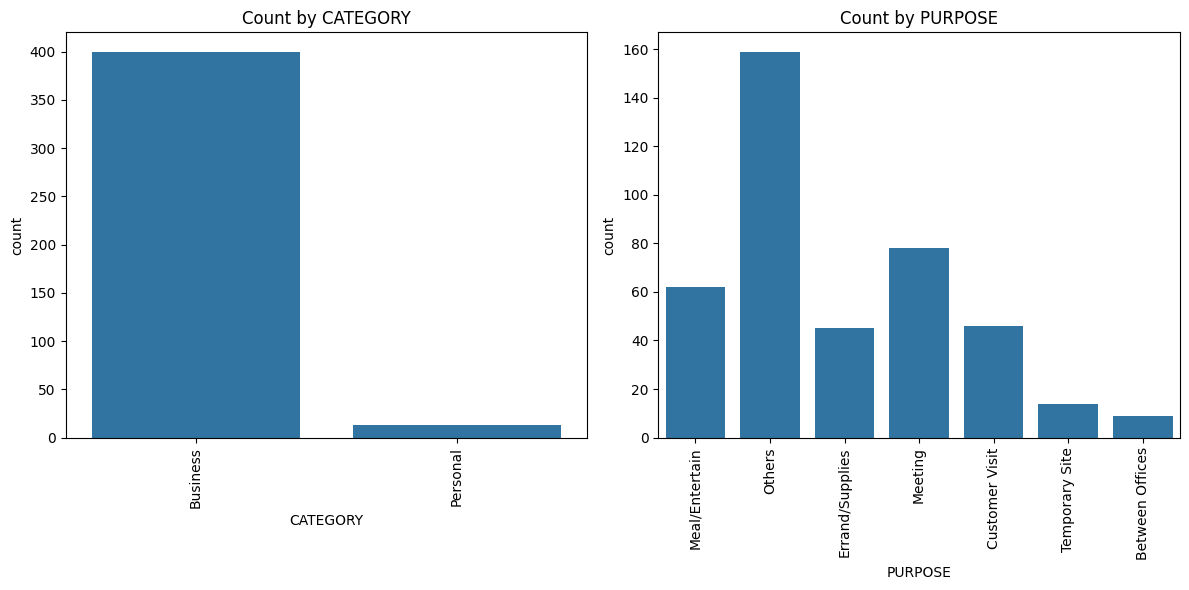

In [16]:
# Using the matplotlib and seaborn libraries to generate the visual charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="CATEGORY")
plt.xticks(rotation=90)
plt.title("Count by CATEGORY")

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="PURPOSE")
plt.xticks(rotation=90)
plt.title("Count by PURPOSE")

plt.tight_layout()
plt.show()

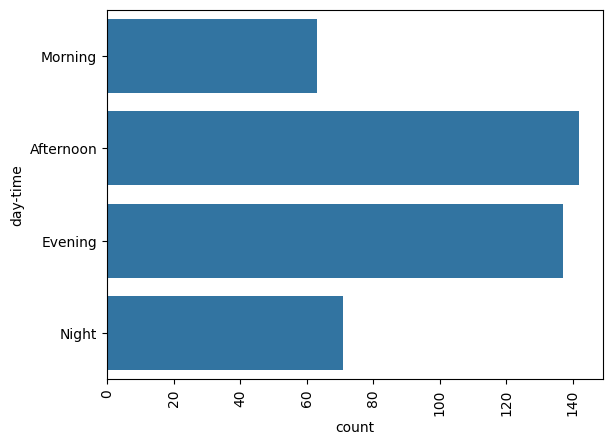

In [17]:
sns.countplot(dataset["day-time"])
plt.xticks(rotation=90)
plt.show()

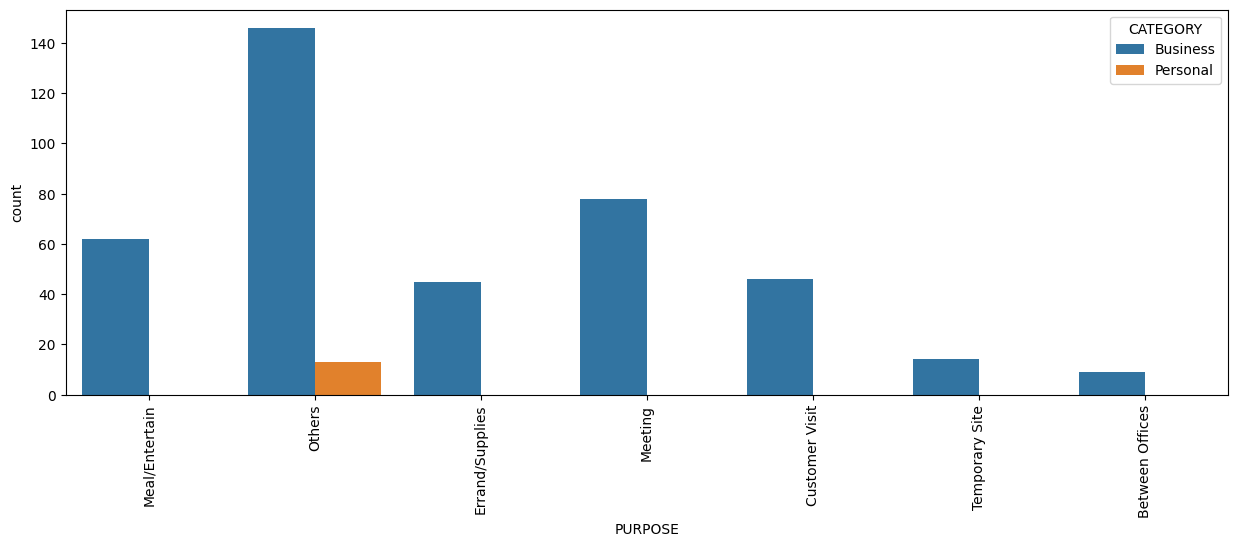

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x="PURPOSE", hue="CATEGORY")
plt.xticks(rotation=90)
plt.show()

In [19]:
# Insights from the above code
"""Most of the rides are booked for business purpose\nMost of the people book uber cabs for Meeting and Meal/Entertain purpose\nMost of the uber cabs are booked in the time duration of 10 a.m. to 5:00 p.m.(Afternoon)"""


'Most of the rides are booked for business purpose\nMost of the people book uber cabs for Meeting and Meal/Entertain purpose\nMost of the uber cabs are booked in the time duration of 10 a.m. to 5:00 p.m.(Afternoon)'

In [20]:
from sklearn.preprocessing import OneHotEncoder

object_cols=["CATEGORY", "PURPOSE"]
OH_encoder=OneHotEncoder(sparse_output=False, handle_unknown="ignore")
OH_cols=pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index=dataset.index
OH_cols.columns=OH_encoder.get_feature_names_out()
df_final=dataset.drop(object_cols, axis=1)
dataset=pd.concat([df_final, OH_cols], axis=1)

<Axes: >

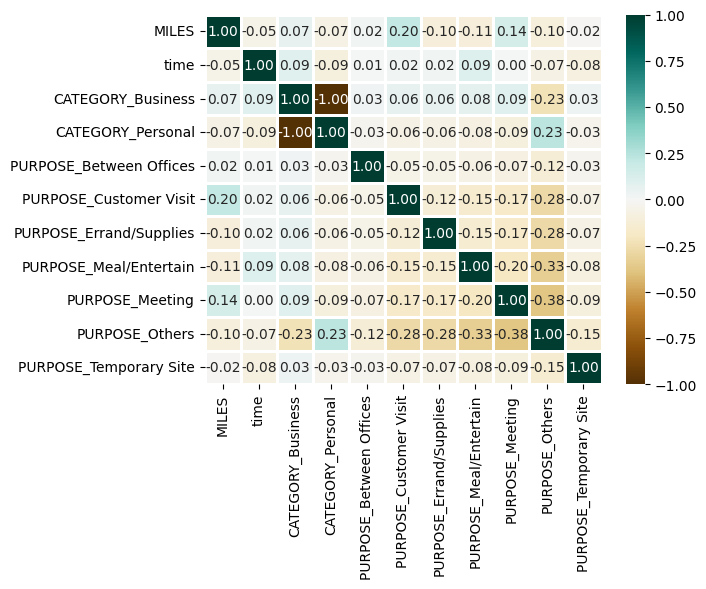

In [21]:
# Selecting only the numerical value column for correlation calculation
numeric_dataset=dataset.select_dtypes(include=["number"])
sns.heatmap(numeric_dataset.corr(), cmap="BrBG", fmt=".2f", linewidths=2, annot=True)

In [22]:
# Insights from the heatmap
"""Business and Personal Category are highly negatively correlated, whuch was proven earlier and it justifies the above conclusions\nNot so much correlation between the features"""

'Business and Personal Category are highly negatively correlated, whuch was proven earlier and it justifies the above conclusions\nNot so much correlation between the features'

In [23]:
# Labeling the months
dataset["MONTH"]=pd.DatetimeIndex(dataset["START_DATE"]).month
month_label={
    1.0:"Jan",
    2.0:"Feb",
    3.0:"Mar",
    4.0:"April",
    5.0:"May",
    6.0:"June",
    7.0:"July",
    8.0:"Aug",
    9.0:"Sept",
    10.0:"Oct",
    11.0:"Nov",
    12.0:"Dec"
}

dataset["MONTH"]=dataset.MONTH.map(month_label)
mon=dataset.MONTH.value_counts(sort=False)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

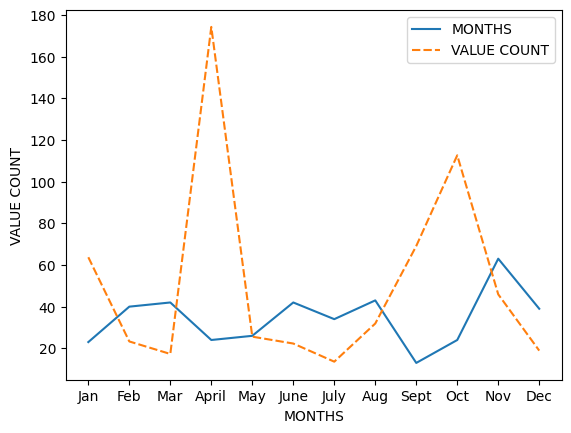

In [24]:
df=pd.DataFrame({"MONTHS":mon.values, "VALUE COUNT":dataset.groupby("MONTH", sort=False)["MILES"].max()})
p=sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [25]:
# In US, the booking of the uber cabs are very high in the month of April and very less in the months of Nov, Dec and Jan

In [26]:
dataset["DAY"]=dataset.START_DATE.dt.weekday
day_label={
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

dataset["DAY"]=dataset["DAY"].map(day_label)

Text(0, 0.5, 'COUNT')

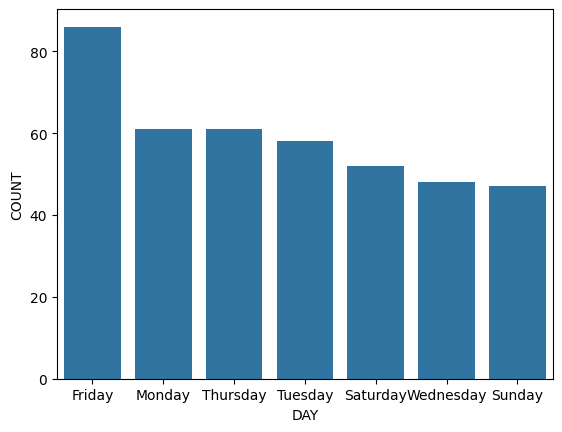

In [27]:
day_label=dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label)
plt.xlabel("DAY")
plt.ylabel("COUNT")

<Axes: ylabel='MILES'>

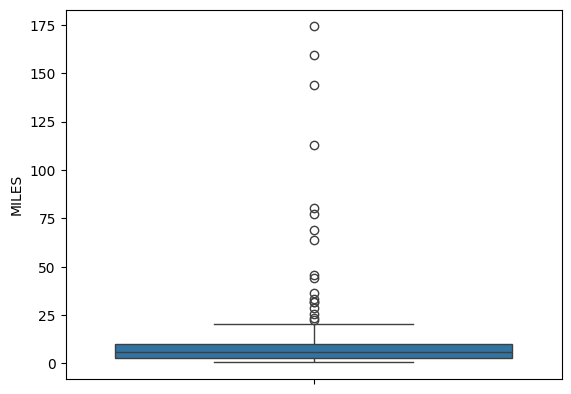

In [28]:
sns.boxplot(dataset["MILES"])

<Axes: ylabel='MILES'>

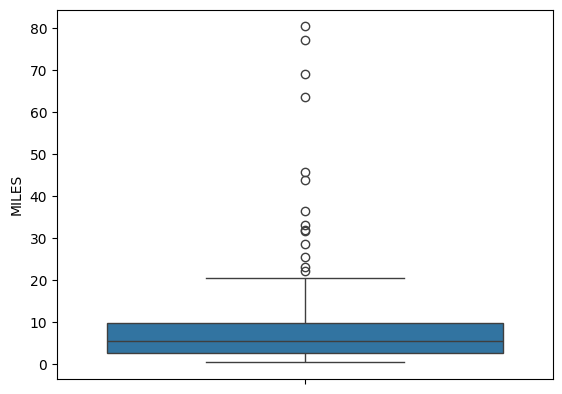

In [29]:
sns.boxplot(dataset[dataset["MILES"]<100]["MILES"])

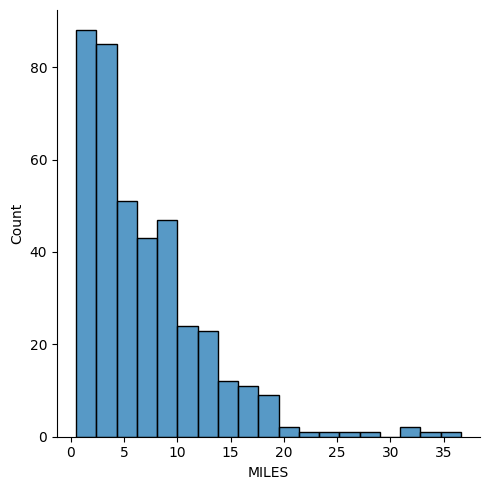

In [30]:
sns.displot(dataset[dataset["MILES"]<40]["MILES"])

In [31]:
# Most of the uber cabs are booked for the distance of 4-5 miles.
# Majorly people choose cabs for the distance of 0-20 miles.
# For distance more than 20 miles, cabs counts is nearly negligible.